# Distributed Systems 2021/22 spring
### Seminar 1: Remote Procedure Calls (RPC)

**Student :** ChengHan Chung

----

**1. Running a Server**

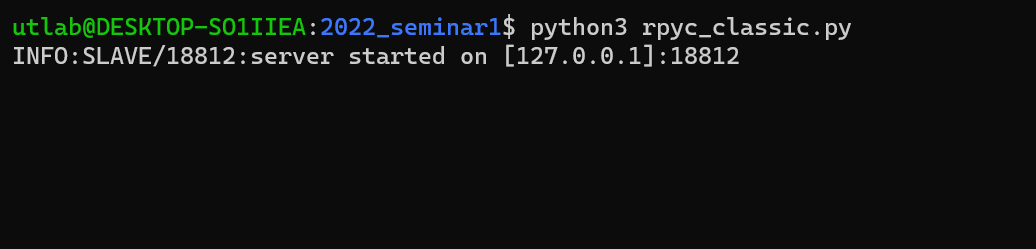

**2. Running a Client**

In [ ]:
import rpyc
import sys
import urllib

if __name__ == "__main__":
   if len(sys.argv) < 2:
      exit("Usage {} SERVER".format(sys.argv[0]))
      
   # Get address on which the server binds
   server = sys.argv[1]
   conn = rpyc.classic.connect(server)

   try:
      
      # Implementation of Bubble Sort
      def bubble_sort(elements):
         # Looping from size of array from last index[-1] to index [0]
         for n in range(len(elements)-1, 0, -1):
            for i in range(n):
               if elements[i] > elements[i + 1]:
                  # swapping data if the element is less than next element in the array
                  elements[i], elements[i + 1] = elements[i + 1], elements[i]
         return elements

      # Transmit functions to the server sides
      conn.teleport(bubble_sort)
      # Execute arbitrary statements on the server
      conn.execute('elements = [39,12,18,85,72,10,2]')
      # Access attribute and implement task
      conn.namespace["elements"] += [13]

      # Show the result
      print("Unsorted list is:", conn.namespace["elements"])
      # Evaluate arbitrary expressions
      print("Sorted Array is:", conn.eval('bubble_sort(elements)'))

   except urllib.error.URLError:
      print('caught a URLError')

2.1 The result of Client side

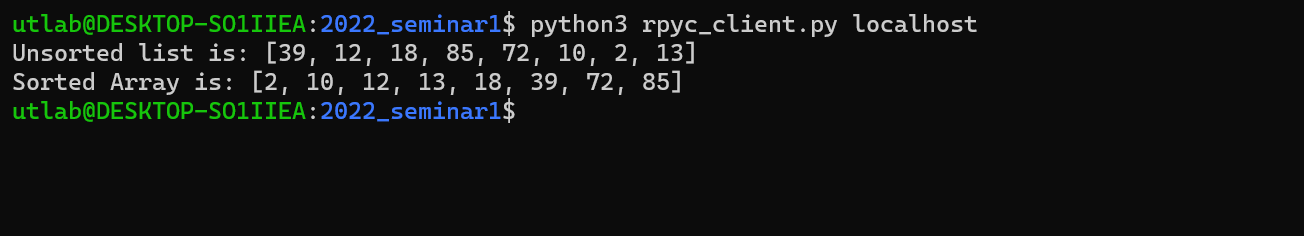

2.2 The result of Server side

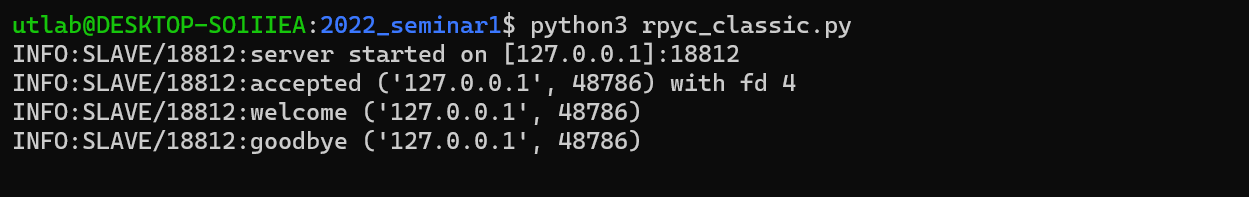